**Data Analysis and Visualization**

In [1]:
# importing require libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
# load dataset
df = pd.read_csv('sentiment.csv')
df.head()

,Phrase,label
0,Spider-man is better than any summer blockbust...,Positive
1,of good sense,Positive
2,", then knock yourself out and enjoy the big sc...",Negative
3,So could young romantics out on a date .,Positive
4,humour,Positive


In [3]:
# shape of the dataset
df.shape

(2800, 2)

In [4]:
# checking how many positive or negative values are there
df.label.value_counts()

Positive    1800
Negative    1000
Name: label, dtype: int64

In [5]:
# checking the null values
df.isnull().sum()

Phrase    0
label     0
dtype: int64

In [6]:
# finding the unique values from the phrase
unique_words = list(df['Phrase'].str.split(' ', expand=True).stack().unique())

print(unique_words)

['Spider-man', 'is', 'better', 'than', 'any', 'summer', 'blockbuster', 'we', 'had', 'to', 'endure', 'last', ',', 'and', 'hopefully', 'sets', 'the', 'tone', 'for', 'a', 'of', 'good', 'stuff', '.', 'sense', 'then', 'knock', 'yourself', 'out', 'enjoy', 'big', 'screen', 'postcard', 'that', 'self-glorified', 'Martin', 'Lawrence', 'lovefest', 'So', 'could', 'young', 'romantics', 'on', 'date', 'humour', 'You', 'bet', 'there', 'it', "'s", 'what', 'makes', 'this', 'rather', 'convoluted', 'journey', 'worth', 'taking', 'tries', 'more', 'Screenwriter', 'Chris', 'ver', 'Weil', 'directing', 'debut', 'good-natured', 'never', 'dull', 'but', 'mood', 'in', 'which', 'an', 'ominous', 'pervasive', 'unknown', 'threat', 'lurks', 'just', 'below', 'proceedings', 'adds', 'almost', 'constant', 'mindset', 'suspense', 'centers', 'midlife', 'crisis', 'hate', 'putting', 'together', 'movies', 'particular', 'value', 'or', 'merit', 'sensual', 'funny', 'Some', 'computer', 'animation', 'handsome', 'right', 'questions', '

In [7]:
# count the unique word from phrase
unique_word_count = df.Phrase.str.split(' ', expand=True).stack().value_counts()

print(unique_word_count)

the         995
,           817
a           740
and         702
of          701
           ... 
His           1
Scherfig      1
spoof         1
bunch         1
safe          1
Length: 1979, dtype: int64


Here, the must frequent word is `the` and total number of unique words is `1979`.

In [8]:
# counting the workds in each row
df['WordCount'] = df['Phrase'].str.split().str.len()

df.head()

,Phrase,label,WordCount
0,Spider-man is better than any summer blockbust...,Positive,27
1,of good sense,Positive,3
2,", then knock yourself out and enjoy the big sc...",Negative,19
3,So could young romantics out on a date .,Positive,9
4,humour,Positive,1


In [9]:
# checking if there is empyt Phrase or not
df[df['WordCount'] == 0]

,Phrase,label,WordCount
981,,Negative,0


In [10]:
# dropping the index which has no phrase
df.drop(df[df['WordCount'] == 0].index, inplace=True)

df.shape

(2799, 3)

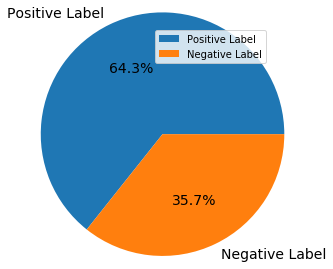

In [11]:
# plotting the pie chart
pos_total = len(df[df['label'] == 'Positive'])
neg_total = len(df[df['label'] == 'Negative'])

textprops = {'fontsize': 14}
plt.pie(x=[pos_total, neg_total], labels=['Positive Label', 'Negative Label'], textprops=textprops, autopct='%0.1f%%', radius=1.4)

plt.legend()
plt.show()

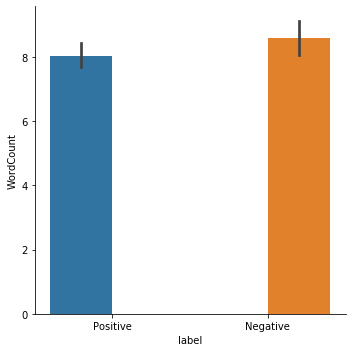

In [12]:
# average wordcount par plot

sns.catplot(x='label', y='WordCount', data=df, kind='bar', hue='label')
plt.show()

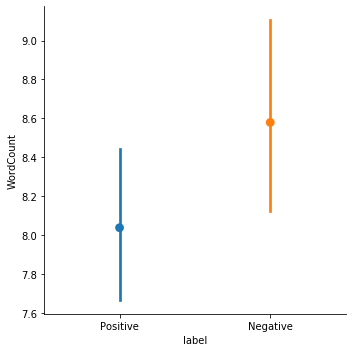

In [13]:
# plotting the categorical data

sns.catplot(x='label', y='WordCount', data=df, kind='point', hue='label')
plt.show()

The above plots shows that the `Negative` label has slightly more word count than the `Positive` word count in general.

In [14]:
# Data cleaning
new_df = df.copy()

In [15]:
# removing (, . !)symbol from the dataset using regular expression
import re

def clean_phrase(dataset):
    clean_data =  re.sub("[^a-z\s']+", " ", dataset, flags = re.IGNORECASE)
    
    return clean_data

In [16]:
# clean data column of phrase
new_df['Phrase'] = new_df['Phrase'].apply(clean_phrase)
new_df.head()

,Phrase,label,WordCount
0,Spider man is better than any summer blockbust...,Positive,27
1,of good sense,Positive,3
2,then knock yourself out and enjoy the big sc...,Negative,19
3,So could young romantics out on a date,Positive,9
4,humour,Positive,1


In [17]:
# new word_count after removing (, . !) from dataframe
new_df['word_count'] = new_df['Phrase'].str.split().str.len()
new_df.head()

,Phrase,label,WordCount,word_count
0,Spider man is better than any summer blockbust...,Positive,27,25
1,of good sense,Positive,3,3
2,then knock yourself out and enjoy the big sc...,Negative,19,18
3,So could young romantics out on a date,Positive,9,8
4,humour,Positive,1,1


In [18]:
# changing label to 1 and 0
def encoding_label(dataset):
    if dataset == 'Positive':
        dataset = 1
    elif dataset == 'Negative':
        dataset = 0
    
    return dataset

new_df['label'] = new_df['label'].apply(encoding_label)
new_df.head()

,Phrase,label,WordCount,word_count
0,Spider man is better than any summer blockbust...,1,27,25
1,of good sense,1,3,3
2,then knock yourself out and enjoy the big sc...,0,19,18
3,So could young romantics out on a date,1,9,8
4,humour,1,1,1


**Calculating of prior, likelihood and posterior**

In [19]:
# splitting number for train and test dataset
total_len = len(new_df)
train_len = int(0.6 * total_len)
test_len = int(0.4 * total_len)

print(total_len, train_len, test_len)

2799 1679 1119


In [20]:
# splitting dataframe
train_df = new_df[: train_len]
test_df = new_df[train_len: ]

print(len(train_df), len(test_df))

1679 1120


In [21]:
# creating unique vocab
all_vocab = list()

for i in train_df['Phrase'].tolist():
    all_vocab.extend(i.split(" "))
    
unique_vocab = list(set(all_vocab))

print('total_vocab : {}, unique_vocab : {}'.format(len(all_vocab), len(unique_vocab)))

total_vocab : 15134, unique_vocab : 1842


In [22]:
# calculating the class priors
class_priors = train_df['label'].value_counts(normalize = True)
class_priors

1    0.646814
0    0.353186
Name: label, dtype: float64

In [23]:
# getting class 0 (Negative) and 1 (Positive) words from phrase
class_0_words = []

for sentence in train_df[train_df['label'] == 0]['Phrase']:
    word_list = sentence.lower().split(" ")
    
    new_word_list = []
    for w in word_list:
        if w != '':
            new_word_list.append(w)
    
    class_0_words.extend(new_word_list)

In [24]:
class_1_words = []

for sentence in train_df[train_df['label'] == 1]['Phrase']:
    word_list = sentence.lower().split(" ")
    
    new_word_list = []
    for w in word_list:
        if w != '':
            new_word_list.append(w)
    
    class_1_words.extend(new_word_list)

In [25]:
# class word dictinary
class_words = {
    0: class_0_words, 
    1: class_1_words
}

**Smoothing**

Counting occurence of word and finding the word probabilites for respective classes and performing laplacian smoothing.

In [26]:
# function
def count_occur(word, word_list):
    count = 0
    
    for w in word_list:
        if word == w:
            count += 1
    
    return count   

def word_probs_with_laplacian_smoothing(class_0_words, class_1_words, alpha, unique_vocab):
    word_probs = {
        0: {},
        1: {}
    }
    
    #Laplacian Smoothing 
    for word in unique_vocab:
        word_probs[0][word] = ((count_occur(word, class_0_words) + alpha) / (len(class_0_words) + alpha * len(unique_vocab)))
        word_probs[1][word] = ((count_occur(word, class_1_words) + alpha) / (len(class_1_words) + alpha * len(unique_vocab)))
    
    return word_probs

Prediction

In [27]:
def prediction(alpha, dataset): 
    word_probs = word_probs_with_laplacian_smoothing(class_0_words, class_1_words, alpha, unique_vocab)
    predicted_class = []
    
    for phrase in dataset:
        phraseArr = phrase.split(" ")
        prob_0_given_string = 1
        prob_1_given_string = 1
        
        for w in phraseArr:
            try:
                prob_0_given_string = prob_0_given_string*word_probs[0][w]
                prob_1_given_string = prob_1_given_string*word_probs[1][w]
            except Exception:
                w_prob_class_0 = ((alpha/len(class_0_words)+alpha*len(unique_vocab)))
                prob_0_given_string = prob_0_given_string*w_prob_class_0
                w_prob_class_1 = ((alpha/len(class_1_words)+alpha*len(unique_vocab)))
                prob_1_given_string = prob_1_given_string*w_prob_class_1
            prob_0_given_string *= class_priors[0]
            prob_1_given_string *= class_priors[1]
           
        if prob_1_given_string > prob_0_given_string:
            predicted_class.append(1)
        else:
            predicted_class.append(0)    

    return predicted_class

In [28]:
predictions = prediction(1, test_df["Phrase"])

In [29]:
# confusion matrix
def get_confusion_matrix(actual, predicted):
    confusion_matrix = np.zeros((2,2))
    for x, y in zip(actual, predicted):
        confusion_matrix[x, y] += 1
    return confusion_matrix

In [30]:
confusion_matrix = get_confusion_matrix(test_df['label'], predictions)

print('Confusion Matrix:\n', confusion_matrix)

Confusion Matrix:
 [[233. 173.]
 [ 29. 685.]]


In [31]:
# accuracy
accuracy=(confusion_matrix[0][0] + confusion_matrix[1][1]) / np.sum(confusion_matrix)

print('Accuracy: ', accuracy)

Accuracy:  0.8196428571428571


In [32]:
# recall
recall=(confusion_matrix[0][0]) / (confusion_matrix[0][0] + confusion_matrix[0][1])

print('Recall: ', recall)

Recall:  0.5738916256157636


In [33]:
# precision
precision=(confusion_matrix[0][0]) / (confusion_matrix[0][0] + confusion_matrix[1][0])

print('Precision: ', precision)

Precision:  0.8893129770992366


In [34]:
# f1 score
f1_score=(2 * recall * precision) / (recall + precision)

print('F1 Score: ', f1_score)

F1 Score:  0.6976047904191617


**ROC curve**

In [35]:
tpr = []
fpr = []

for alpha in np.arange(1,100,1):
    predictions = prediction(alpha,test_df["Phrase"])
    confusion_matrix = get_confusion_matrix(test_df["label"], predictions)
    
    true_pos_rate = (confusion_matrix[0][0]) / (confusion_matrix[0][0]+confusion_matrix[0][1])
    false_pos_rate = (confusion_matrix[1][0]) / (confusion_matrix[1][0]+confusion_matrix[1][1])
    
    tpr.append(true_pos_rate)
    fpr.append(false_pos_rate)

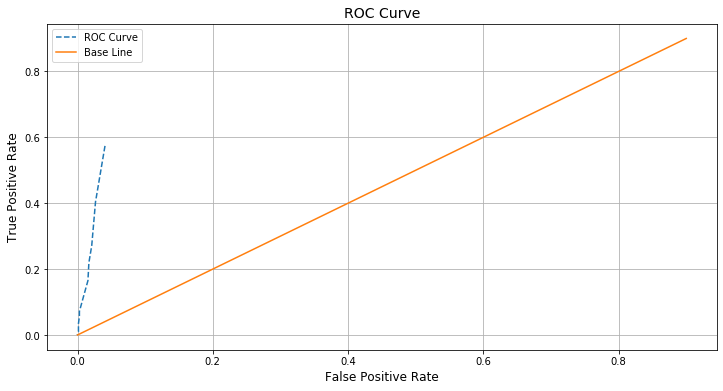

In [36]:
# plotting ROC curve
plt.figure(figsize = (12, 6))
base = np.arange(0,1,0.1)

plt.plot(fpr, tpr, linestyle='--', label='ROC Curve')
plt.plot(base, base, label='Base Line')

plt.title('ROC Curve', fontsize = 14)
plt.xlabel('False Positive Rate', fontsize = 12)
plt.ylabel('True Positive Rate', fontsize = 12)

plt.legend()
plt.grid()
plt.show() 